In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73377 entries, 0 to 73376
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    73377 non-null  int64  
 1   V1      73377 non-null  float64
 2   V2      73377 non-null  float64
 3   V3      73377 non-null  float64
 4   V4      73377 non-null  float64
 5   V5      73377 non-null  float64
 6   V6      73377 non-null  float64
 7   V7      73377 non-null  float64
 8   V8      73377 non-null  float64
 9   V9      73377 non-null  float64
 10  V10     73377 non-null  float64
 11  V11     73377 non-null  float64
 12  V12     73377 non-null  float64
 13  V13     73377 non-null  float64
 14  V14     73377 non-null  float64
 15  V15     73377 non-null  float64
 16  V16     73377 non-null  float64
 17  V17     73377 non-null  float64
 18  V18     73377 non-null  float64
 19  V19     73377 non-null  float64
 20  V20     73377 non-null  float64
 21  V21     73377 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,...,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73376.000000,73376.000000,73376.000000,73376.000000,73376.000000
mean,35585.573872,-0.253191,-0.026959,0.678866,0.168021,-0.272388,0.098351,-0.113787,0.055719,0.009983,...,-0.028672,-0.106260,-0.038610,0.006354,0.135416,0.024027,0.002334,0.003027,97.319552,0.002426
std,14672.723434,1.880796,1.665003,1.408884,1.372497,1.387707,1.304997,1.252286,1.234504,1.155997,...,0.737871,0.637365,0.622186,0.596241,0.439999,0.498403,0.386990,0.325267,270.209620,0.049194
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,29408.000000,-1.012767,-0.594981,0.191359,-0.725068,-0.890076,-0.639160,-0.604468,-0.141902,-0.676331,...,-0.225578,-0.525467,-0.178807,-0.324765,-0.128400,-0.328183,-0.063013,-0.005802,7.680000,0.000000
50%,38645.000000,-0.246674,0.071742,0.767744,0.187161,-0.304873,-0.152364,-0.073795,0.067809,-0.075887,...,-0.059954,-0.080278,-0.050791,0.062493,0.173443,-0.074571,0.009396,0.022852,26.625000,0.000000
75%,46739.000000,1.153498,0.726269,1.400254,1.052199,0.265093,0.492396,0.420147,0.347037,0.655599,...,0.116148,0.308621,0.079952,0.403607,0.422133,0.303708,0.082495,0.075879,88.970000,0.000000
max,55107.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [ ]:
df['Class'].value_counts()


,count
Class,
0.0,73198
1.0,178


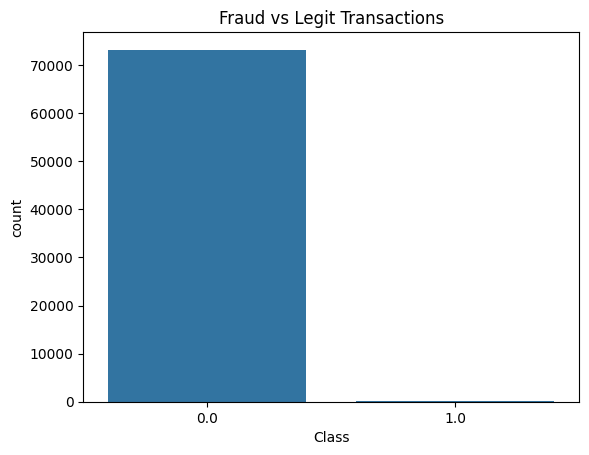

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Legit Transactions")
plt.show()


In [ ]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))


In [ ]:
df = df.drop(['Amount', 'Time'], axis=1)


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print(np.isnan(X_train).sum())
print(np.isinf(X_train).sum())


4
0


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print("y_train class distribution:")
print(y_train.value_counts())


y_train class distribution:
Class
0.0    58557
1.0      143
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
print(type(X_train), X_train.shape)
print(type(y_train), np.unique(y_train))


<class 'numpy.ndarray'> (58701, 30)
<class 'numpy.ndarray'> [ 0.  1. nan]
